### Watson ML

Since we were not able to find a significant factors using statistics, we will use Watson ML to create a model that can be used by this notebook (and other apps) via rest API.

Watson ML allows you to rapidly create a model. If we get a score that are good enough (to us) we can use this. If the score is still not satifactory, we can use a notebook to try and tune the model for a better score. Tuning will take more time, so we will start with Watson ML.

We will need a spark service, which is already running for this notebook, and a Watson ML- these are running in the IBM Cloud, or they can be deployed locally with DSX Local.

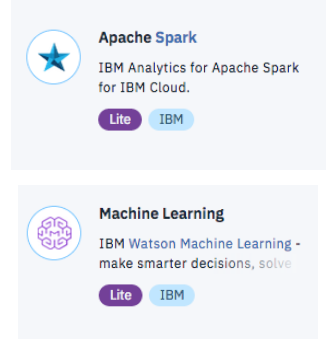



### 1. Create a New Model

First we will find the "Models Section" of the Project and Create a new model

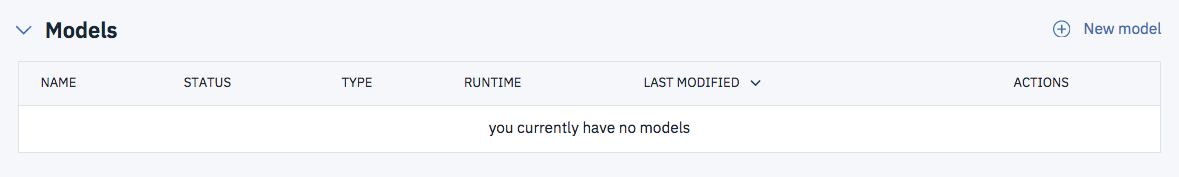

### 2. Give the model a name

Select the Watson ML and Spark service in the IBM Cloud. If you don't have one, it will take you through the steps to create one.

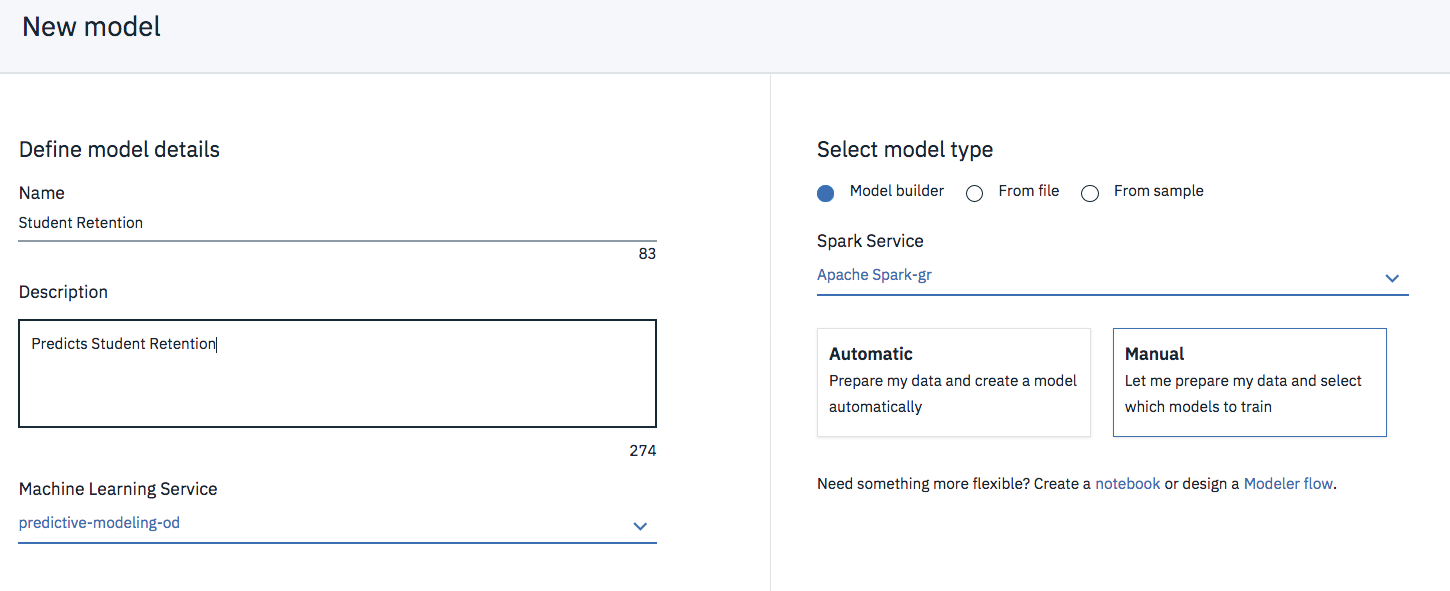

### 3. Select the Data

The data was already uploaded from a previous notebook, so we can simply select it:

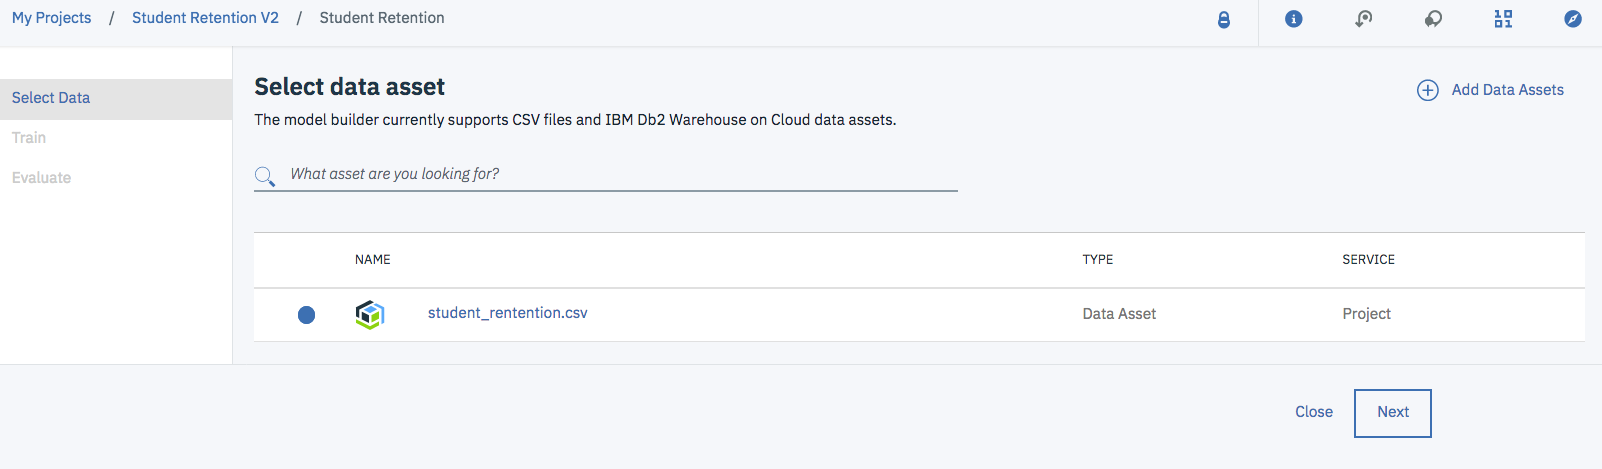

### Select your target (what you want predicted) and models to try

Since this is a binary problem (they either were retained, or were not retained as the only outcomes) this is a Binary Classification. I selected all the columns as factors, since we don't know the important ones based off the previous analysis.

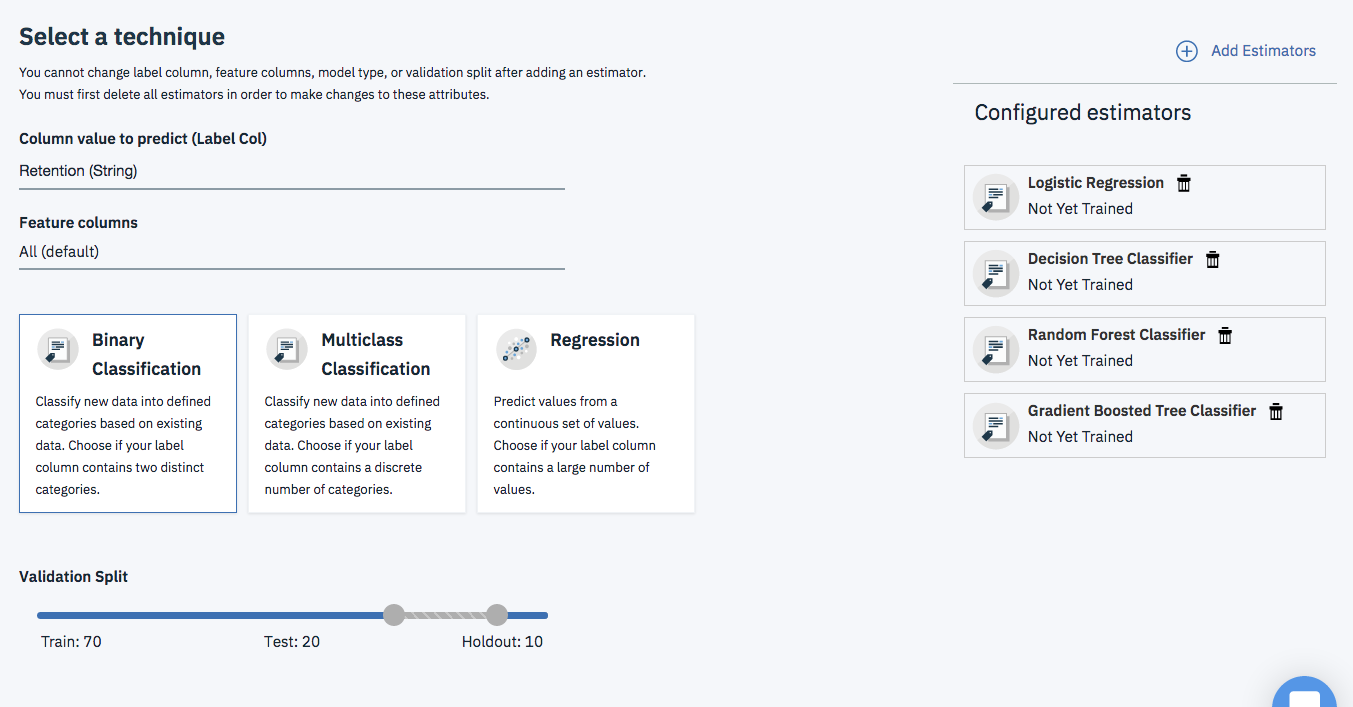

Watson ML will automatically classify the data and train each model and determine the most important features (columns), giving you a score:

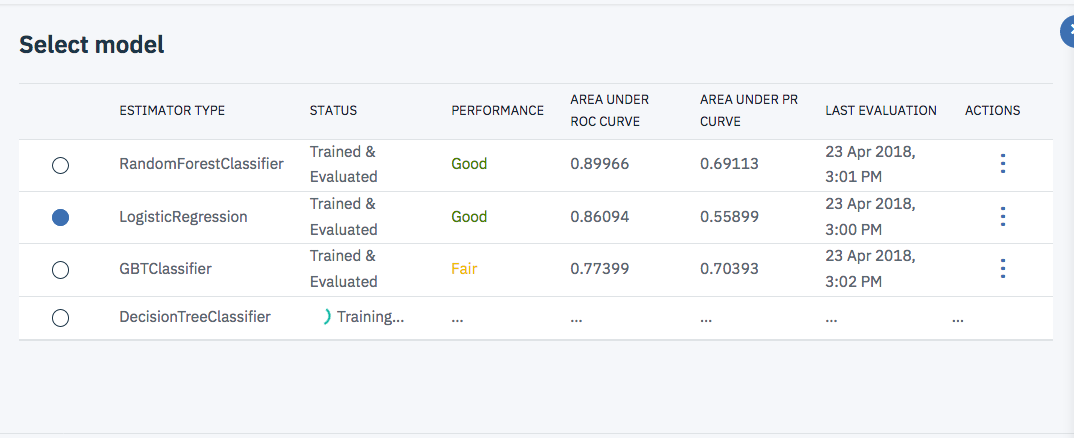

Once the models are finished training and testing, you can see how they scored. In this case, it looks like Random Forest produced the best score, so we will deploy this model by clicking "Save" in the lower right hand corner.

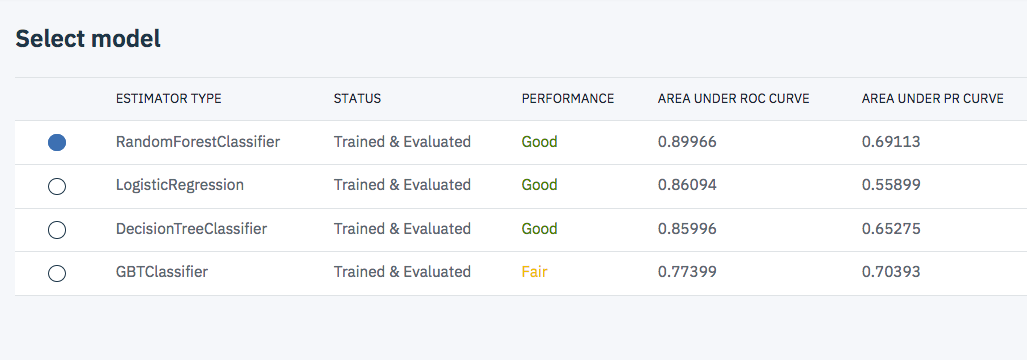

This is done by clicking the "Add Deployment" on the screen.

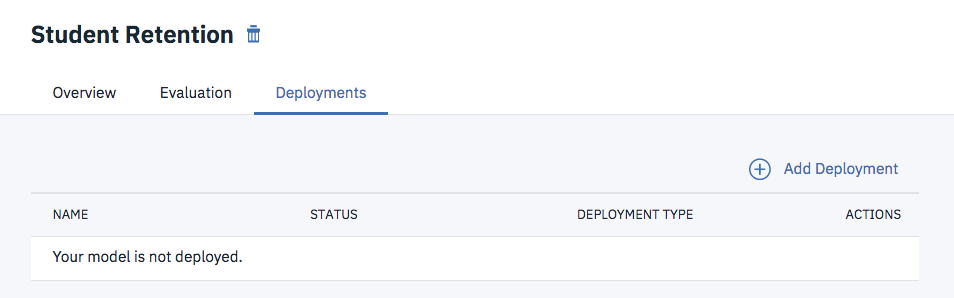

We create the deployment for the model:

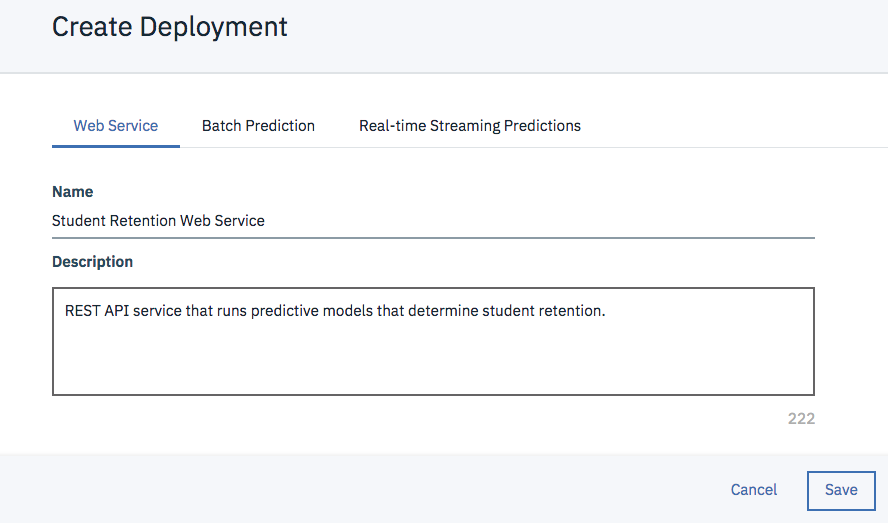

The service is automatically deployed and started:

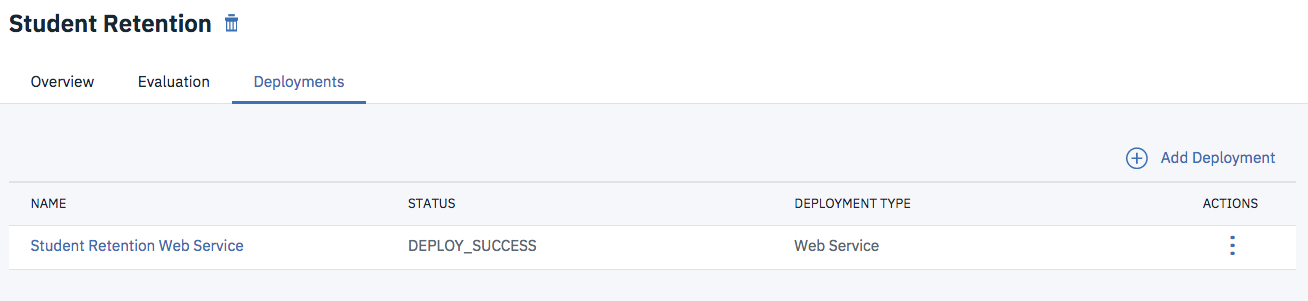

We can now write apps, use notebooks (example below), or anything that uses REST to engage this model. Once a "better" model comes along, we can simply replace the model in the service, instantly improving any applications that utilize this model. Example code to utilize the model is provided:

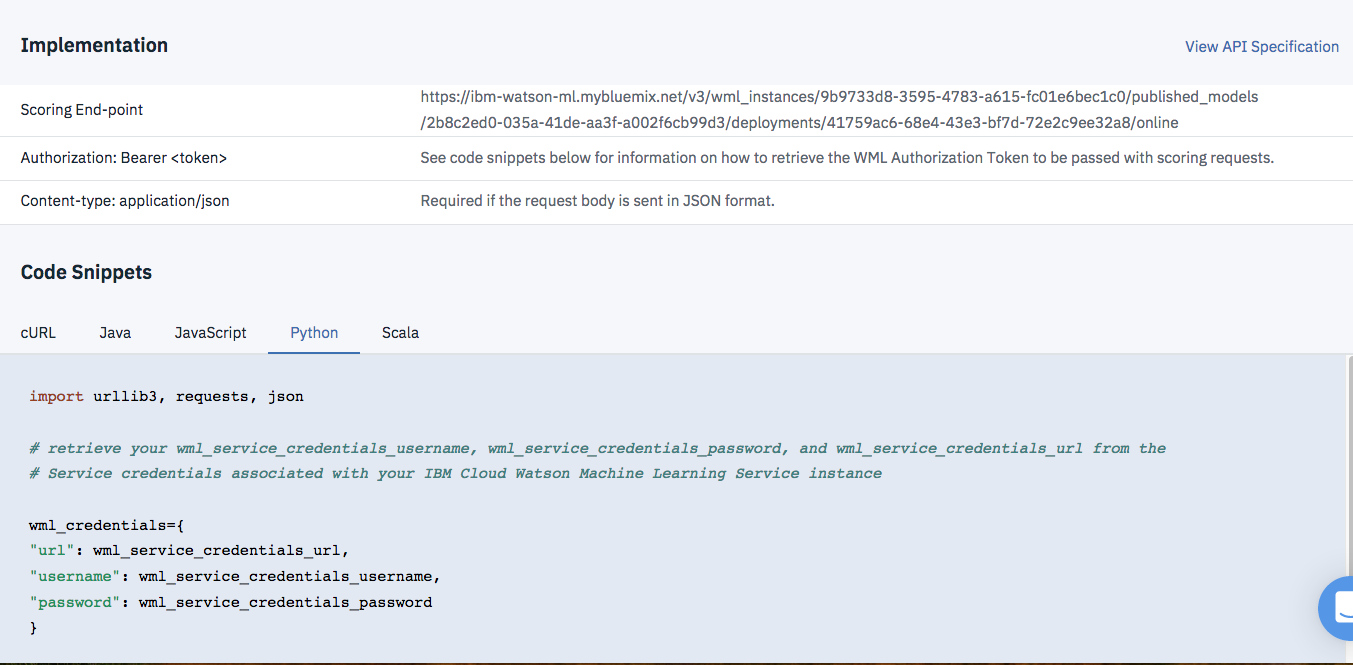

### Setup the credentials to connect the notebook to the Watson ML Service

This was provided in the model setup screen above.

In [1]:
import urllib3, requests, json

In [2]:
wml_credentials = { 
    "url": "https://ibm-watson-ml.mybluemix.net",
    "username": "<username>",
    "password": "<password>"
}

In [3]:
headers = urllib3.util.make_headers(basic_auth='{username}:{password}'.format(username=wml_credentials['username'], password=wml_credentials['password']))
url = '{}/v3/identity/token'.format(wml_credentials['url'])
response = requests.get(url, headers=headers)
mltoken = json.loads(response.text).get('token')

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

### Submit an instance of a student for prediction of retainment

This is in JSON. Normally, an application would have input to make input easier, however, it can be done in a notebook as well. Examples were provided in the model setup above on how to do this.

In [22]:
payload_scoring = {"fields": ["Gender", "College", "In or Out of State", "Citizenship", "Marital Status", "Type of High School", "Applied Financial Aid", "Received Financial Aid", "Other Scholarships", "Tuition Rate", "Expected 4 Year Revenue", "Open Houses", "Visits", "High School GPA", "AP Tests Passed", "Acceptance Type", "Recruited Athlete", "High School Class Size", "HS Class Rank", "Student Health", "Total Class Hours", "Overall GPA", "Change in GPA", "Housing", "Club Memberships", "Infirmary Visits", "City", "State"], "values": [["Female","Business","Out of State","Yes","Single","Private","Yes","No","No",1975,237000,0,1,3.303028939,1,"Standard","Yes","300-400","1st Quartile","Good",21,2.807741935,"Positive","On Campus",2,0,"Birmingham, AL","Alabama"]]}


In [6]:
response_scoring = requests.post('https://ibm-watson-ml.mybluemix.net/v3/wml_instances/9b9733d8-3595-4783-a615-fc01e6bec1c0/published_models/2b8c2ed0-035a-41de-aa3f-a002f6cb99d3/deployments/41759ac6-68e4-43e3-bf7d-72e2c9ee32a8/online', json=payload_scoring, headers=header)
print("Scoring response")
print(json.loads(response_scoring.text))

Scoring response
{'values': [['Female', 'Business', 'Out of State', 'Yes', 'Single', 'Private', 'Yes', 'No', 'No', 1975, 237000, 0, 1, 3.303028939, 1, 'Standard', 'Yes', '300-400', '1st Quartile', 'Good', 21, 2.807741935, 'Positive', 'On Campus', 2, 0, 'Birmingham, AL', 'Alabama', [27, [1, 5, 7, 9, 10, 12, 13, 14, 16, 17, 20, 21, 24, 26], [0.5218901569145268, 2.000023511556549, 2.1147515622091997, 8.125513144643584, 8.125513144643604, 4.648670941014184, 11.779593027226518, 2.3689580328890987, 10.266907629135142, 1.2095193659004588, 10.147113971619659, 12.509198827640137, 1.9607273725851555, 3.8580967254623277]], [18.48668903356421, 1.513310966435789], [0.9243344516782106, 0.07566554832178946], 0.0, 'Retained', ['Retained', 'Not retained']]], 'fields': ['Gender', 'College', 'In or Out of State', 'Citizenship', 'Marital Status', 'Type of High School', 'Applied Financial Aid', 'Received Financial Aid', 'Other Scholarships', 'Tuition Rate', 'Expected 4 Year Revenue', 'Open Houses', 'Visits

Becausue it's in JSON, the percent chance of retainment can be a bit difficult to see- we will extract it using python below:

In [23]:
prediction = json.loads(response_scoring.text) 
percentReadmit = prediction["values"][0][30][0]* 100

print ("Patient has a ", round(percentReadmit,3), "% chance of retainment")

Patient has a  92.433 % chance of retainment


### Conclusion

With 89.9% confidence, the patient above has a 92% chance of retainment. For many problems, this would be a "good enough" solution. However, if we wanted to tune hyper parameters or determine what the most important features are, we could go even deeper by using a Python notebook.